## Task 1

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import logging

In [45]:
# import local libraries
import sys
sys.path.insert(0,'../scripts/') # add script path
from data_information import DataInfo
from graph import *
from ML_model import *

### Load data

In [3]:
# load store data
store_df = pd.read_csv('../data/store.csv')
store_data_info = DataInfo(store_df)
store_data_info.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
# load train data
train_df = pd.read_csv('../data/train.csv')
train_data_info = DataInfo(train_df)
train_data_info.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
# load test data
test_df = pd.read_csv('../data/test.csv')
test_data_info = DataInfo(test_df)
test_data_info.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


##### combine the store and train data on  the store id

In [6]:
store_train_df = pd.merge(train_df, store_df, on = 'Store')
store_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Data cleaning

In [7]:
store_train_info = DataInfo(store_train_df)
store_train_info.get_percentage_missing_columns()

,Missing Count,%Missing
ColumnName,,
Store,0,0.0
DayOfWeek,0,0.0
Date,0,0.0
Sales,0,0.0
Customers,0,0.0
Open,0,0.0
Promo,0,0.0
StateHoliday,0,0.0
SchoolHoliday,0,0.0


In [8]:
# drop columns with over 30% missing values
store_train_df = store_train_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                                     'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis = 1)
store_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0


* no null values in the train data
* fill Open column of the test data with mean value

In [9]:
test_df['Open'].fillna((test_df['Open'].mean()), inplace = True)

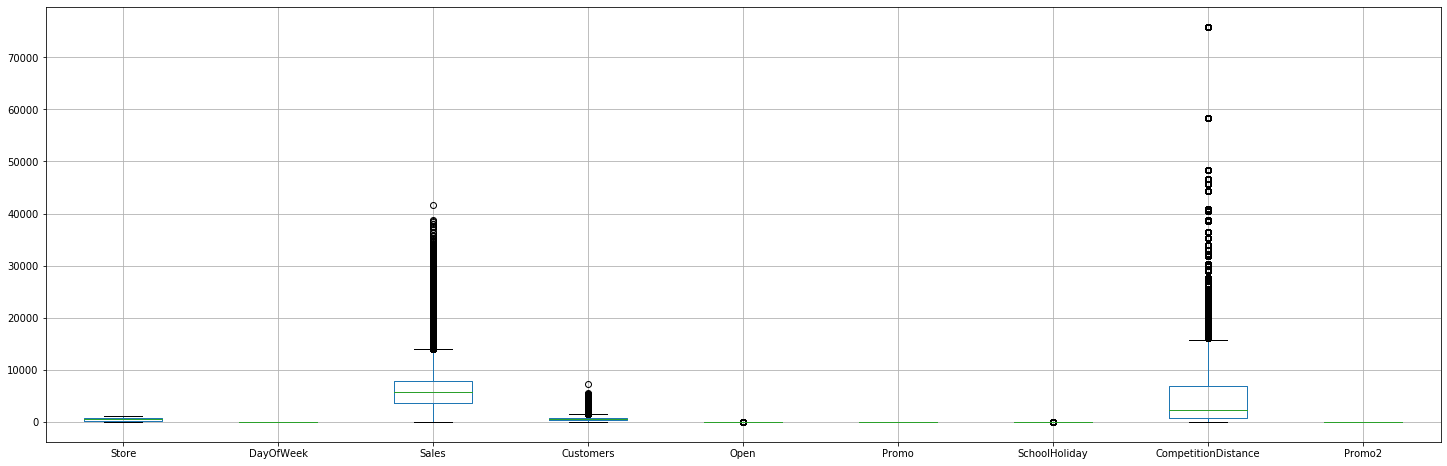

In [10]:
# boxplot to check for outliers
fig = plt.figure(figsize =(25, 8))
store_train_df.boxplot()

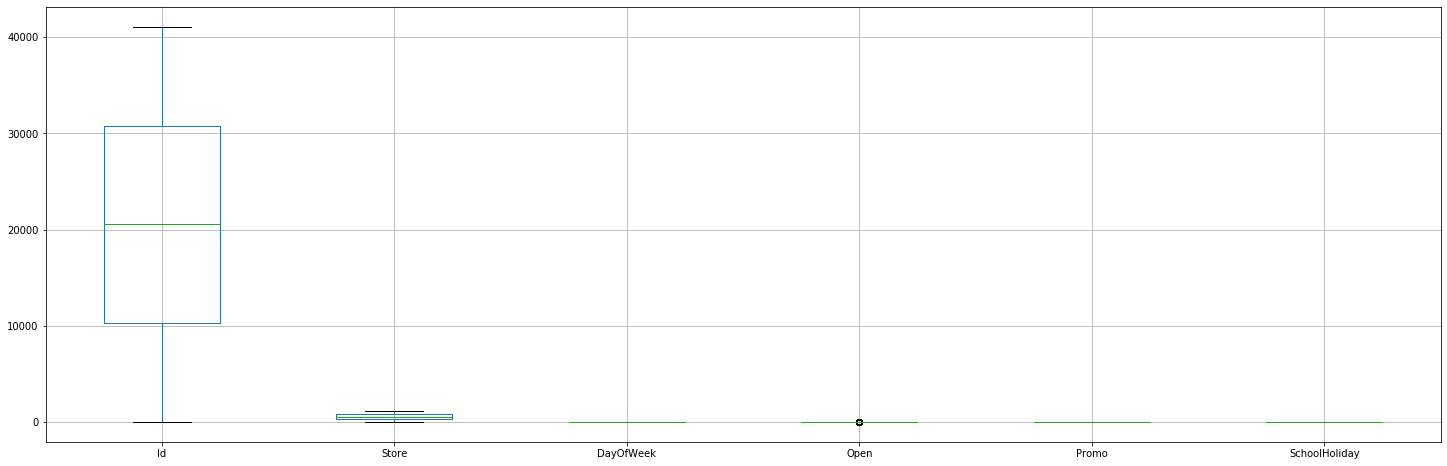

In [11]:
# boxplot to check for outlier
fig = plt.figure(figsize =(25, 8))
test_df.boxplot()

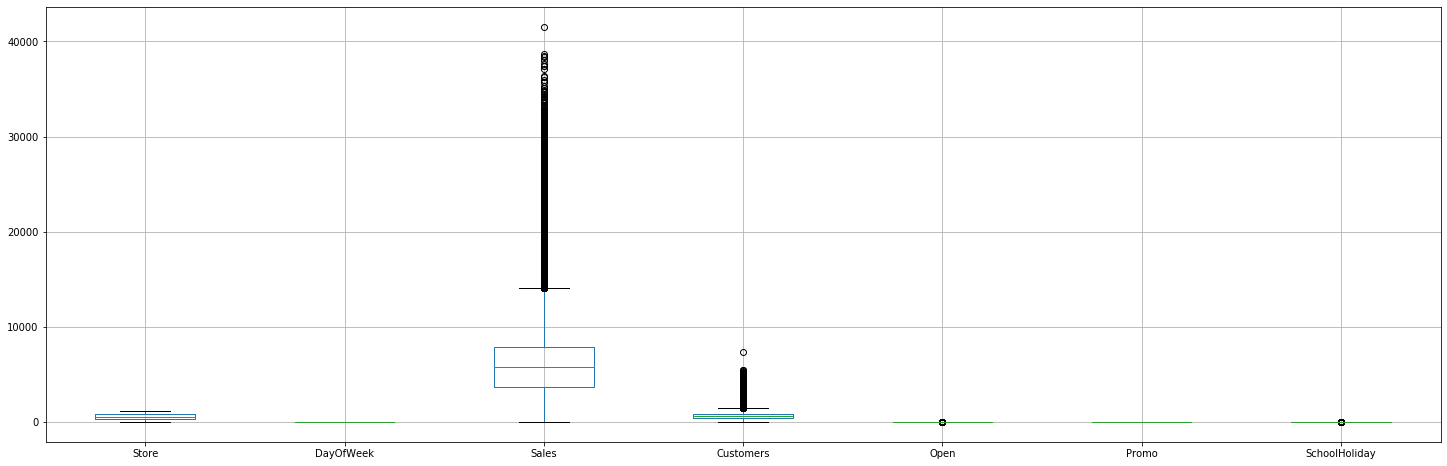

In [12]:
# boxplot to check for outlier
fig = plt.figure(figsize =(25, 8))
train_df.boxplot()

##### Replace store_train data with median values

In [13]:
print(store_train_df['Sales'].quantile(0.50))
print(store_train_df['Sales'].quantile(0.95))
store_train_df['Sales'] = np.where(store_train_df['Sales'] > 12137, 5744, store_train_df['Sales'])

5744.0
12137.0


In [14]:
store_train_df['Customers'] = np.where(store_train_df['Customers'] > store_train_df['Customers'].quantile(0.95),
                                       store_train_df['Customers'].quantile(0.50), store_train_df['Customers'])

store_train_df['Open'] = np.where(store_train_df['Open'] > store_train_df['Open'].quantile(0.95),
                                       store_train_df['Open'].quantile(0.50), store_train_df['Open'])

store_train_df['SchoolHoliday'] = np.where(store_train_df['SchoolHoliday'] > store_train_df['SchoolHoliday'].quantile(0.95),
                                       store_train_df['SchoolHoliday'].quantile(0.50), store_train_df['SchoolHoliday'])

store_train_df['CompetitionDistance'] = np.where(store_train_df['CompetitionDistance'] > store_train_df['CompetitionDistance'].quantile(0.95),
                                       store_train_df['CompetitionDistance'].quantile(0.50), store_train_df['CompetitionDistance'])

##### Replace train data with median values

In [15]:
train_df['Sales'] = np.where(train_df['Sales'] > train_df['Sales'].quantile(0.95),
                                       train_df['Sales'].quantile(0.50), train_df['Sales'])



train_df['Customers'] = np.where(train_df['Customers'] > train_df['Customers'].quantile(0.95),
                                       train_df['Customers'].quantile(0.50), train_df['Customers'])

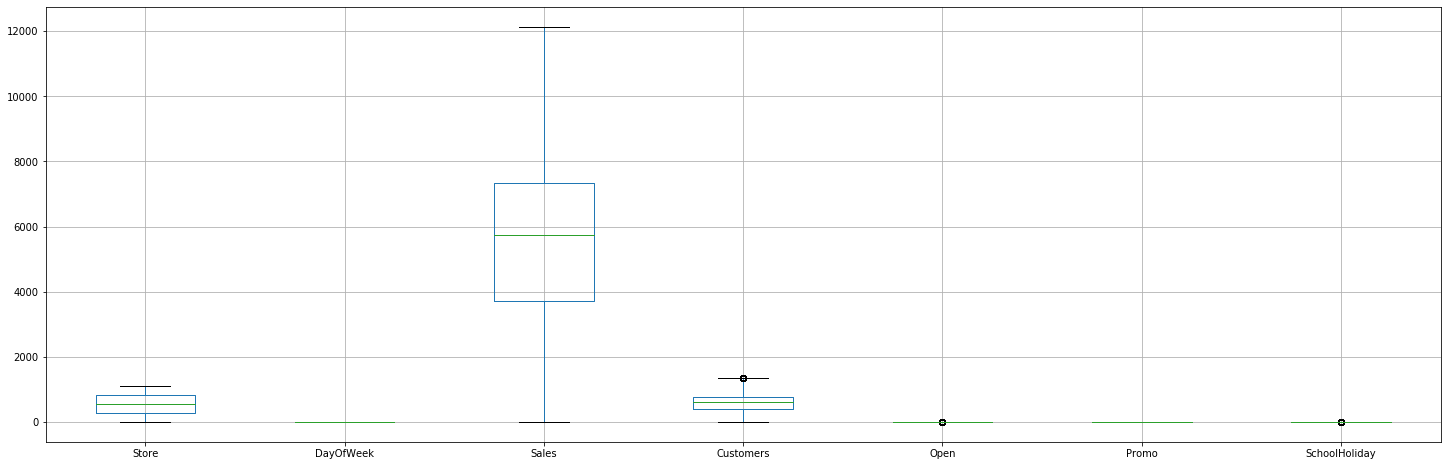

In [16]:
fig = plt.figure(figsize =(25, 8))
train_df.boxplot()

##### fix datatypes of columns

In [17]:
# convert Date columns
train_df['Date']= pd.to_datetime(train_df['Date'])
test_df['Date']= pd.to_datetime(test_df['Date'])
store_train_df['Date']= pd.to_datetime(store_train_df['Date'])

### Exploration of customer purchasing behavior

* Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

<Figure size 936x468 with 0 Axes>

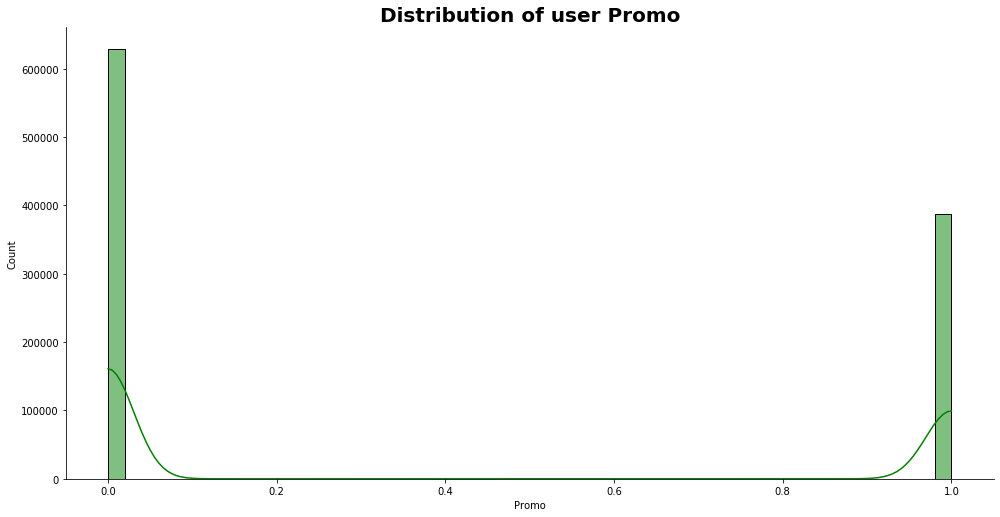

In [18]:
plot_hist(train_df, 'Promo', 'green')

<Figure size 936x468 with 0 Axes>

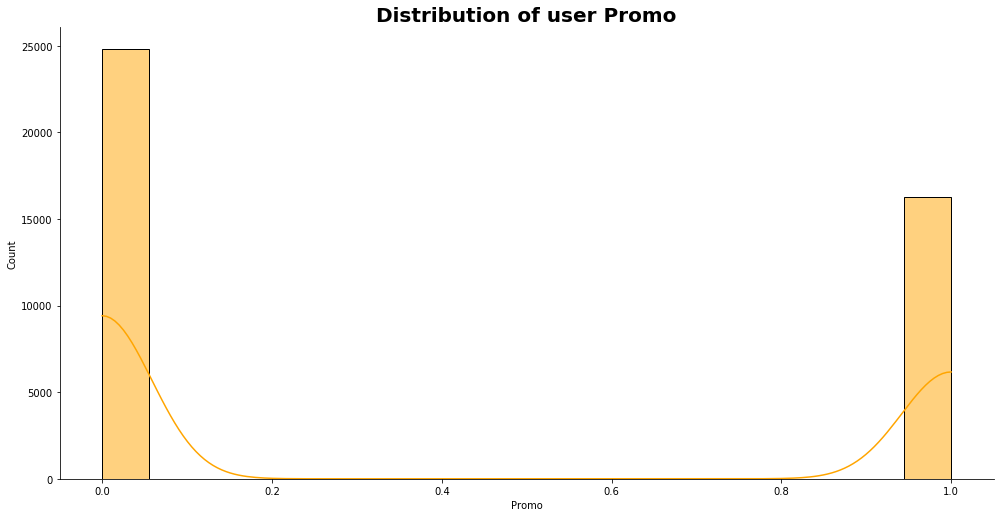

In [19]:
plot_hist(test_df, 'Promo', 'orange')

Promotions are distributed similarly between these two groups. The count of not participating between the two is greater than participating.

* Check & compare sales behavior before, during and after holidays

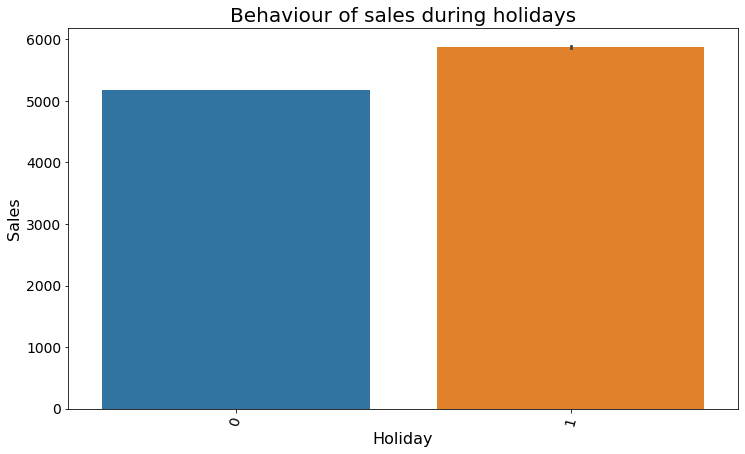

In [20]:
plot_bar(train_df, 'SchoolHoliday', 'Sales', 'Behaviour of sales during holidays', 'Holiday', 'Sales')

* Find out any seasonal (Christmas, Easter etc) purchase behaviours,

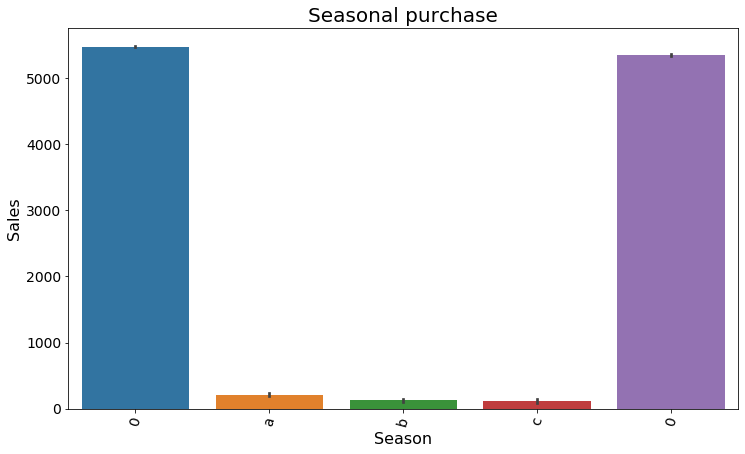

In [21]:
plot_bar(train_df, 'StateHoliday', 'Sales', 'Seasonal purchase', 'Season', 'Sales')

There are less purchases during holiday seasons such as Christmas, Easter etc. compared to when there are no seasons

* What can you say about the correlation between sales and number of customers?

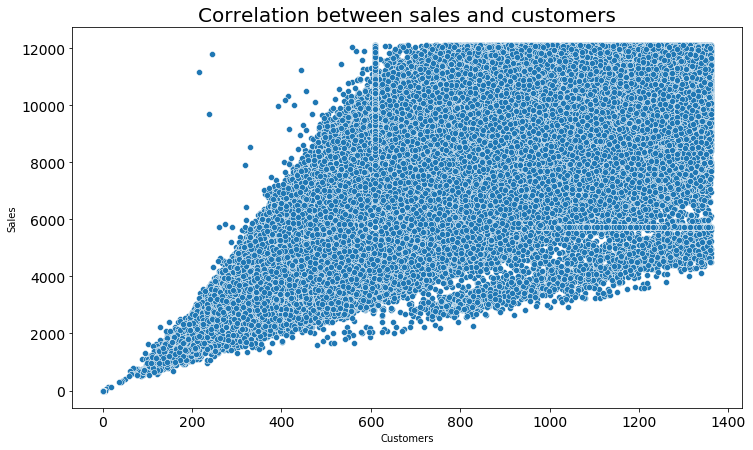

In [22]:
simple_plot_scatter(train_df , 'Customers', 'Sales', 'Correlation between sales and customers')

As customers increase, the more sales made by the pharamcy as such from the graph, it can be inferred that the number of customers and sales are highly correlated and positively increased.

* How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

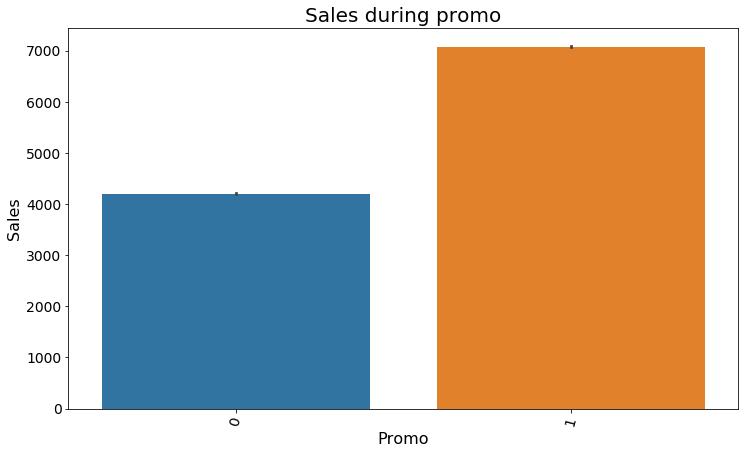

In [23]:
plot_bar(train_df, 'Promo', 'Sales', 'Sales during promo', 'Promo', 'Sales')

There tends to be more sales when the store runs promos.

* Trends of customer behavior during store open and closing times

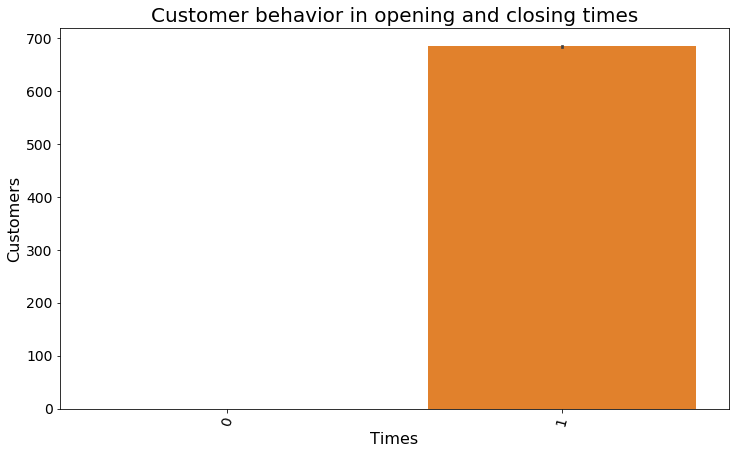

In [24]:
plot_bar(train_df, 'Open', 'Customers', 'Customer behavior in opening and closing times', 'Times', 'Customers')

Customers only visit the stores during opening hours.

* Which stores are opened on all weekdays? How does that affect their sales on weekends?

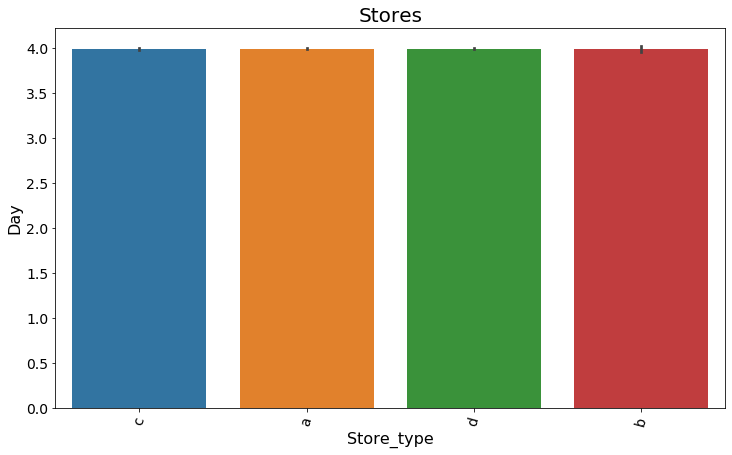

In [25]:
plot_bar(store_train_df, 'StoreType', 'DayOfWeek', 'Stores', 'Store_type', 'Day')

All stores are opened every weeekday.

* Check how the assortment type affects sales

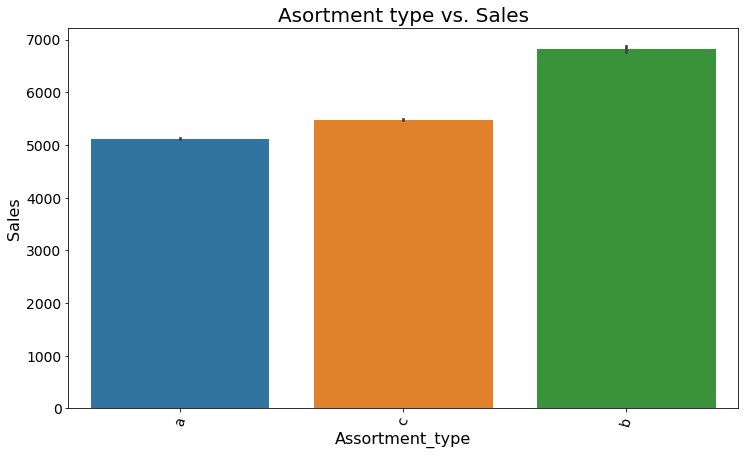

In [26]:
plot_bar(store_train_df, 'Assortment', 'Sales', 'Asortment type vs. Sales', 'Assortment_type', 'Sales')

The extended assortment type has the highest record of sales.

* How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

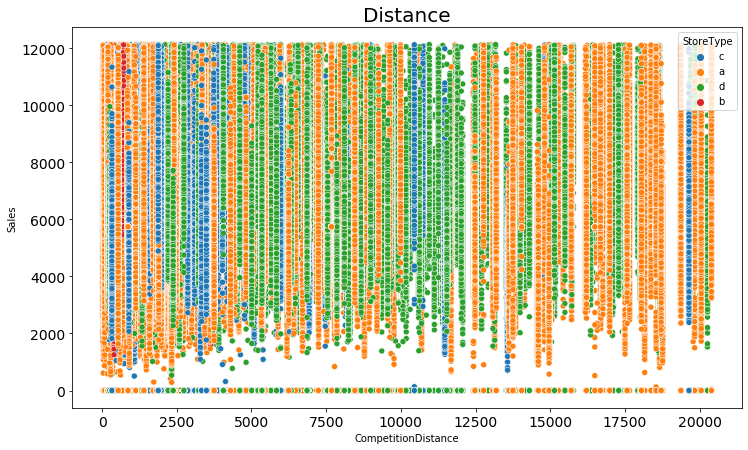

In [27]:
# plot bar graph with hue
plot_scatter(store_train_df, 'CompetitionDistance', 'Sales', 'Distance', 'StoreType')

* Slaes per day

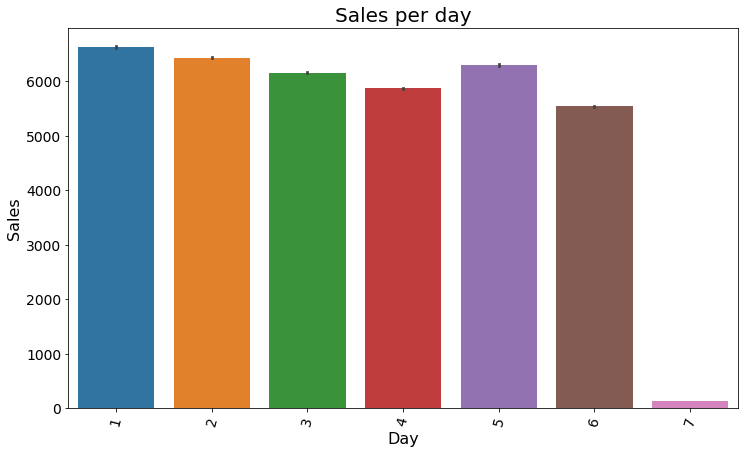

In [28]:
plot_bar(store_train_df, 'DayOfWeek', 'Sales', 'Sales per day', 'Day', 'Sales')

There are greter sales on weekdays with the highest amount of sale record to be over 6000 on Mondays, Tuesdays and Fridays, the least sales for the weekday is on Thursdays. Weekends records the lowest amount of sales especially Sundays having about little or no sales.

## Task 2

### preprocessing

In [29]:
# extract new features from train data
train_df['Year'] = train_df.Date.dt.year
train_df['Month'] = train_df.Date.dt.month
train_df['Day'] = train_df.Date.dt.day
#train_df['Weekend'] = train_df.Date.dt.weekend

In [30]:
def week_day(dataframe:pd.DataFrame, day_of_week_col:str) -> pd.DataFrame:
    date_index = dataframe.columns.get_loc(day_of_week_col)
    dataframe = dataframe.copy(deep=True)
    dataframe.insert(date_index + 1, 'WeekDay', dataframe[day_of_week_col].apply(lambda x: 1 if x <= 5 else 0))
    
    return dataframe

In [31]:
train_df = week_day(train_df, 'DayOfWeek')

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   WeekDay        1017209 non-null  int64         
 3   Date           1017209 non-null  datetime64[ns]
 4   Sales          1017209 non-null  float64       
 5   Customers      1017209 non-null  float64       
 6   Open           1017209 non-null  int64         
 7   Promo          1017209 non-null  int64         
 8   StateHoliday   1017209 non-null  object        
 9   SchoolHoliday  1017209 non-null  int64         
 10  Year           1017209 non-null  int64         
 11  Month          1017209 non-null  int64         
 12  Day            1017209 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 100.9+ MB


In [33]:
# encode data
train_df['StateHoliday']=[0 if i == '0' else 1 if i == 'a' else 2 if i == 'b' else 3 for i in train_df['StateHoliday']]
test_df['StateHoliday']=[0 if i == '0' else 1 if i == 'a' else 2 if i == 'b' else 3 for i in test_df['StateHoliday']]

In [34]:
# drop columns
train_df.drop(['Store','Date','Customers'],axis=1,inplace=True)
test_df.drop(['Id', 'Store', 'Date'],axis=1,inplace=True)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   DayOfWeek      1017209 non-null  int64  
 1   WeekDay        1017209 non-null  int64  
 2   Sales          1017209 non-null  float64
 3   Open           1017209 non-null  int64  
 4   Promo          1017209 non-null  int64  
 5   StateHoliday   1017209 non-null  int64  
 6   SchoolHoliday  1017209 non-null  int64  
 7   Year           1017209 non-null  int64  
 8   Month          1017209 non-null  int64  
 9   Day            1017209 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 77.6 MB


In [36]:
# separate training features from target
X = train_df.drop(['Sales'],axis=1)
y = train_df['Sales']

In [38]:
# split data (60,20,20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
test_df = scaler.fit_transform(test_df)

### Modelling

In [46]:
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

mlflow.autolog()
# create a base model
rf = RandomForestRegressor()
with mlflow.start_run() as run:
    rf.fit(x_train, y_train)

    train_score = rf.score(x_train, y_train)
    valid_score = rf.score(x_val,y_val)
    valid_metrics = calculate_metrics(y_val,rf.predict(x_val))
    test_score = rf.score(x_test,y_test)
    test_metrics = calculate_metrics(y_test, rf.predict(x_test))

    mlflow.log_metric("Valid Score", valid_score)
    mlflow.log_metrics(valid_metrics)
    mlflow.log_metric("Test Score", test_score)
    mlflow.log_metrics(test_metrics)

2021/07/30 10:04:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [47]:
train_score

0.6768982280698399

In [48]:
valid_score

0.6771166759670557

In [49]:
valid_metrics

{'RMSE Score': 1767.0231787826365,
 'R2_Squared': 0.6771166759670557,
 'MAE Score': 1294.5021341548938}

In [50]:
test_metrics

{'RMSE Score': 1767.0231787826365,
 'R2_Squared': 0.6771166759670557,
 'MAE Score': 1294.5021341548938}

In [51]:
# feature importance
features = pd.DataFrame()
features["Feature"] = x_train.columns
features["Importance"] = rf.feature_importances_
features.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,Open,0.876295
3,Promo,0.084135
8,Day,0.014148
0,DayOfWeek,0.010326
7,Month,0.009782
6,Year,0.002624
5,SchoolHoliday,0.001380
1,WeekDay,0.000729
4,StateHoliday,0.000579


In [52]:
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'criterion': ['mse'],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

rf2 = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
# grid_search.best_params_

# best_grid = grid_search.best_estimator_